In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.discriminant_analysis import StandardScaler
from statistics import LinearRegression
from scipy import stats
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from scipy import stats

Đoạn mã Python này là một tập hợp các lệnh import, đưa vào các thư viện và hàm cần thiết cho một dự án học máy, cụ thể là phân tích hồi quy tuyến tính.

1. `pandas` và `numpy` là các thư viện cơ bản cho việc thao tác và phân tích dữ liệu trong Python.
2. `matplotlib.pyplot` là thư viện vẽ đồ thị 2D trong Python.
3. `sklearn` (Scikit-learn) là thư viện học máy cho Python, bao gồm nhiều thuật toán học máy như hồi quy tuyến tính, cây quyết định, v.v.
4. `joblib` là một tập hợp các công cụ cung cấp pipeline nhẹ trong Python, thường được sử dụng để lưu mô hình cho sử dụng sau mà không cần huấn luyện lại.
5. `statistics` là một module Python cung cấp các hàm để tính toán thống kê toán học của dữ liệu số.
6. `scipy.stats` chứa một số lượng lớn các phân phối xác suất cũng như một thư viện đang phát triển của các hàm thống kê.

In [2]:
# Bước 1: Đọc dữ liệu từ file dataset.csv
df = pd.read_csv('./data/dataset.csv')
print(df.head())

    TinhTrangBDS  DienTich  Phongngu TenPhanKhu  SoTang  PhongTam       Loai  \
0    Đã bàn giao      62.0         2        NaN     NaN         2   Chung cư   
1    Đã bàn giao      95.0         3        NaN     NaN         2   Chung cư   
2  Chưa bàn giao      75.0         2          2     5.0         2   Chung cư   
3    Đã bàn giao      70.0         1          A     7.0         1   Chung cư   
4    Đã bàn giao      83.0         2        NaN     NaN         2   Chung cư   

          GiayTo      MaCanHo   TinhTrangNoiThat HuongCuaChinh HuongBanCong  \
0       Đã có sổ          NaN                NaN           NaN          NaN   
1    Đang chờ sổ          NaN   Nội thất cao cấp           NaN          NaN   
2   Giấy tờ khác           17                NaN      Đông Nam     Đông Nam   
3    Đang chờ sổ   BPA - 0712   Nội thất cao cấp      Đông Nam      Tây Bắc   
4       Đã có sổ          NaN   Nội thất cao cấp       Tây Bắc          NaN   

    DacDiem            Quan       USD  
0   

In [3]:
# in ra tỉ lệ nan của từng cột
df.isna().sum()/df.shape[0]*100

TinhTrangBDS         0.000000
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          71.745885
SoTang              73.165099
PhongTam             0.000000
Loai                 0.000000
GiayTo              24.416359
MaCanHo             86.458683
TinhTrangNoiThat    48.778132
HuongCuaChinh       62.277461
HuongBanCong        65.019315
DacDiem             77.628485
Quan                 0.000000
USD                  0.000000
dtype: float64

In [4]:
# xóa các cột có tỉ lệ nan > 50%
# vòng lặp while để xóa các cột có tỉ lệ nan > 50% cho đến khi nào không còn cột nào có tỉ lệ nan > 50%, lưu vào df_dropped
df_dropped = df.copy()
while True:
    for col in df_dropped.columns:
        if df_dropped[col].isna().sum()/df_dropped.shape[0]*100 > 50:
            df_dropped = df_dropped.drop(col, axis=1)
            break
    else:
        break

In [5]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23816 entries, 0 to 23815
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TinhTrangBDS      23816 non-null  object 
 1   DienTich          23816 non-null  float64
 2   Phongngu          23816 non-null  int64  
 3   PhongTam          23816 non-null  int64  
 4   Loai              23816 non-null  object 
 5   GiayTo            18001 non-null  object 
 6   TinhTrangNoiThat  12199 non-null  object 
 7   Quan              23816 non-null  object 
 8   USD               23816 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [6]:
df_dropped.head(5)

,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Quan,USD
0,Đã bàn giao,62.0,2,2,Chung cư,Đã có sổ,NaN,Quận 7,80000.0
1,Đã bàn giao,95.0,3,2,Chung cư,Đang chờ sổ,Nội thất cao cấp,Quận 7,212000.0
2,Chưa bàn giao,75.0,2,2,Chung cư,Giấy tờ khác,NaN,Quận Bình Tân,103200.0
3,Đã bàn giao,70.0,1,1,Chung cư,Đang chờ sổ,Nội thất cao cấp,Quận Tân Bình,160000.0
4,Đã bàn giao,83.0,2,2,Chung cư,Đã có sổ,Nội thất cao cấp,Quận 6,118000.0


In [7]:
df_x = df_dropped.drop(['USD'], axis=1)
df_y = df_dropped['USD']

In [8]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,TinhTrangBDS_Đã bàn giao,"Loai_ Căn hộ dịch vụ, mini",Loai_ Duplex,Loai_ Officetel,Loai_ Penthouse,"Loai_ Tập thể, cư xá",GiayTo_ Đang chờ sổ,...,Quan_ Quận 7,Quan_ Quận 8,Quan_ Quận 9,Quan_ Quận Bình Thạnh,Quan_ Quận Bình Tân,Quan_ Quận Gò Vấp,Quan_ Quận Phú Nhuận,Quan_ Quận Thủ Đức,Quan_ Quận Tân Bình,Quan_ Quận Tân Phú
0,62.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,95.00,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,70.00,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,83.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,68.52,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23812,76.00,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23813,115.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23814,82.00,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale data về dạng chuẩn

In [9]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)
data_preprocessed = scaler.transform(data_preprocessed)

In [10]:
# Bước 2: Tách dữ liệu thành 2 tập X và Y
X = data_preprocessed
Y = df_y


In [11]:
# Bước 3: Tách tập X và Y thành 2 tập train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19052, 36)
(19052,)
(4764, 36)
(4764,)


In [12]:
# Bước 4: Xây dựng mô hình hồi quy tuyến tính với tập train
model = linear_model.LinearRegression().fit(X_train, Y_train)

Đoạn mã Python này thực hiện việc tiền xử lý dữ liệu và huấn luyện mô hình hồi quy tuyến tính sử dụng thư viện Scikit-learn.

Đầu tiên, một đối tượng `StandardScaler` được tạo ra. Đối tượng này sẽ được sử dụng để chuẩn hóa các đặc trưng bằng cách loại bỏ giá trị trung bình và chia tỷ lệ về độ lệch chuẩn đơn vị. Phương thức `fit()` được gọi trên dữ liệu đã tiền xử lý để tính toán giá trị trung bình và độ lệch chuẩn, sau đó sẽ được sử dụng để chia tỷ lệ. Sau đó, phương thức `transform()` được sử dụng để thực hiện việc chuẩn hóa thực sự bằng cách tập trung và chia tỷ lệ.

Tiếp theo, dữ liệu đã tiền xử lý được chia thành tập huấn luyện và tập kiểm tra sử dụng hàm `train_test_split()`. Kích thước tập kiểm tra được đặt là 0.2, có nghĩa là 20% dữ liệu sẽ được sử dụng cho việc kiểm tra và phần còn lại cho việc huấn luyện. Tham số `random_state` được đặt là 42 để đảm bảo rằng các phân chia được tạo ra có thể tái tạo được. Sau đó, kích thước của tập huấn luyện và tập kiểm tra được in ra.

Cuối cùng, một mô hình `LinearRegression` được tạo và phù hợp với dữ liệu huấn luyện sử dụng phương thức `fit()`. Điều này huấn luyện mô hình để tìm ra đường thẳng tốt nhất phù hợp với dữ liệu huấn luyện. Sau bước này, mô hình đã sẵn sàng để thực hiện dự đoán.

In [13]:
# Bước 5: Dự đoán kết quả với tập test
Y_pred = model.predict(X_test).__abs__()
Y_pred

array([ 27819.59053132,  44813.54615649,  44040.24739953, ...,
       150923.74964156, 224135.06831018, 286382.73194023])

In [14]:
perc = np.abs((Y_pred - Y_test)/Y_test)
perc = perc.values*100

In [15]:
np.array([Y_pred, Y_test, perc])

array([[2.78195905e+04, 4.48135462e+04, 4.40402474e+04, ...,
        1.50923750e+05, 2.24135068e+05, 2.86382732e+05],
       [3.64000000e+04, 7.40000000e+04, 5.68000000e+04, ...,
        1.56000000e+05, 2.12000000e+05, 2.20000000e+05],
       [2.35725535e+01, 3.94411538e+01, 2.24643532e+01, ...,
        3.25400664e+00, 5.72408883e+00, 3.01739691e+01]])

In [16]:
data = {'Gia du doan':Y_pred,
        'Gia thuc':Y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)
A

,Gia du doan,Gia thuc,% sai lech
12983,27819.590531,36400.0,23.572553
4291,44813.546156,74000.0,39.441154
6242,44040.247400,56800.0,22.464353
1056,161715.063526,174000.0,7.060308
423,145733.111788,100000.0,45.733112
...,...,...,...
12078,86587.674834,76000.0,13.931151
2312,145498.725863,332000.0,56.175083
10662,150923.749642,156000.0,3.254007
13642,224135.068310,212000.0,5.724089


In [17]:
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
23048,31999.897182,32000.0,0.000321
9084,98017.511165,98000.0,0.017869
15911,76015.466167,76000.0,0.020350
22810,143967.766985,144000.0,0.022384
22634,245944.853573,246000.0,0.022417
...,...,...,...
12235,104233.226618,10400.0,902.242564
12441,101637.303947,10000.0,916.373039
23784,190227.663481,16800.0,1032.307521
22934,560411.809473,16000.0,3402.573809


In [18]:
# in ra tổng các dữ liệu Y_test nếu % sai lệch > 50%
B[B['% sai lech'] > 50]['Gia thuc'].count()

724

In [19]:
B['% sai lech'].describe()

count    4764.000000
mean       36.780466
std        98.489650
min         0.000321
25%         8.430175
50%        17.969768
75%        35.363796
max      3452.331269
Name: % sai lech, dtype: float64

In [20]:
# Bước 6: Đánh giá mô hình
# hàm đánh giá mô hình hồi quy tuyến tính giữa tập test và tập predict
def evaluate_model(Y_test, Y_pred):
    # in ra R square
    print('R square: ', r2_score(Y_test, Y_pred))
    # in ra MSE
    print('MSE: ', mean_squared_error(Y_test, Y_pred))
    # in ra MAE
    print('MAE: ', np.mean(np.abs(Y_pred - Y_test)))
    # in ra RMSE
    print('RMSE: ', mean_squared_error(Y_test, Y_pred, squared=False))
    # in ra hệ số chặn 
    print('Hệ số chặn: ', model.intercept_)
    print("\n")
    print('y =', model.intercept_)
    for col, coef in zip(data_dummies.columns, model.coef_):
        print('+ {:.2f} * {}'.format(coef, col))
        
    
evaluate_model(Y_test, Y_pred)

R square:  0.6251523557270311
MSE:  2213168274.148059
MAE:  27788.31523476132
RMSE:  47044.32244328808
Hệ số chặn:  110498.17774870127


y = 110498.17774870127
+ 41545.21 * DienTich
+ 4500.69 * Phongngu
+ 1997.36 * PhongTam
+ -981.77 * TinhTrangBDS_Đã bàn giao
+ 1748.98 * Loai_ Căn hộ dịch vụ, mini
+ 467.59 * Loai_ Duplex
+ 1012.36 * Loai_ Officetel
+ 961.66 * Loai_ Penthouse
+ 887.36 * Loai_ Tập thể, cư xá
+ 1108.05 * GiayTo_ Đang chờ sổ
+ -6469.18 * GiayTo_ Đã có sổ
+ 555.37 * TinhTrangNoiThat_ Hoàn thiện cơ bản
+ 7161.24 * TinhTrangNoiThat_ Nội thất cao cấp
+ 545.32 * TinhTrangNoiThat_ Nội thất đầy đủ
+ -2260.02 * Quan_ Huyện Củ Chi
+ -1584.71 * Quan_ Huyện Hóc Môn
+ -658.03 * Quan_ Huyện Nhà Bè
+ 12097.16 * Quan_ Quận 1
+ 13202.89 * Quan_ Quận 10
+ 2058.47 * Quan_ Quận 11
+ 570.56 * Quan_ Quận 12
+ 17903.26 * Quan_ Quận 2
+ 4742.48 * Quan_ Quận 3
+ 8986.94 * Quan_ Quận 4
+ 17462.37 * Quan_ Quận 5
+ 3628.76 * Quan_ Quận 6
+ 9506.17 * Quan_ Quận 7
+ 1812.61 * Quan_ Quận 8
+ 5274.86 *

Đoạn mã Python này định nghĩa hàm `evaluate_model` để đánh giá mô hình hồi quy tuyến tính. Hàm này nhận hai đối số: `Y_test` (giá trị thực tế) và `Y_pred` (giá trị dự đoán bởi mô hình), và thực hiện các bước sau:

1. Tính và in ra giá trị R-squared, đo lường mức độ phù hợp của mô hình với dữ liệu.
2. Tính và in ra Sai số bình phương trung bình (MSE), đo lường trung bình bình phương sai số.
3. Tính và in ra Sai số tuyệt đối trung bình (MAE), đo lường trung bình sự khác biệt tuyệt đối giữa dự đoán và giá trị thực tế.
4. Tính và in ra Sai số bình phương trung bình căn bậc hai (RMSE), đo lường căn bậc hai của MSE.
5. In ra hệ số chặn của mô hình, là giá trị dự kiến của `Y` khi tất cả `X=0`.
6. In ra phương trình của mô hình, thể hiện mối quan hệ giữa biến mục tiêu và các biến đặc trưng.

Cuối cùng, hàm `evaluate_model` được gọi với `Y_test` và `Y_pred` để in ra các chỉ số đánh giá và phương trình của mô hình.


1. `R square: 0.6251523557270311` - Giá trị R-squared (R bình phương) cho thấy mô hình hồi quy của bạn giải thích được khoảng 62.5% sự biến đổi của biến phụ thuộc. Điều này có nghĩa là mô hình có thể dự đoán chính xác 62.5% dữ liệu, một kết quả tương đối tốt.

2. `MSE: 2213168274.148059` - Sai số bình phương trung bình (MSE) khá cao, cho thấy mô hình có thể không phù hợp tốt với dữ liệu hoặc có thể có một số giá trị ngoại lệ lớn ảnh hưởng đến kết quả.

3. `MAE: 27788.31523476132` - Sai số tuyệt đối trung bình (MAE) cho thấy trung bình mỗi dự đoán của mô hình sai lệch khoảng 27788 đơn vị so với giá trị thực tế.

4. `RMSE: 47044.32244328808` - Sai số bình phương trung bình căn bậc hai (RMSE) cũng khá cao, cho thấy mô hình có thể không phù hợp tốt với dữ liệu.

5. `Hệ số chặn: 110498.17774870127` - Hệ số chặn cho thấy khi tất cả các biến độc lập đều bằng 0, giá trị dự đoán sẽ là 110498.17774870127.

Tóm lại, mô hình có thể cần được cải thiện thêm để giảm sai số và tăng độ chính xác của dự đoán.

In [21]:
# Bước 7: Dự đoán kết quả với 1 giá trị mới
# Giá trị mới
new_data = {
    "DienTich": [66],
    "Phongngu": [2],
    "PhongTam": [2],
    "TinhTrangBDS_Đã bàn giao": [1],
    "Loai_ Căn hộ dịch vụ, mini": [1],
    "Loai_ Duplex": [0],
    "Loai_ Officetel": [0],
    "Loai_ Penthouse": [0],
    "Loai_ Tập thể, cư xá": [0],
    "GiayTo_ Đang chờ sổ": [0],
    "GiayTo_ Đã có sổ": [1],
    "TinhTrangNoiThat_ Hoàn thiện cơ bản": [0],
    "TinhTrangNoiThat_ Nội thất cao cấp": [1],
    "TinhTrangNoiThat_ Nội thất đầy đủ": [0],
    "Quan_ Huyện Củ Chi": [0],
    "Quan_ Huyện Hóc Môn": [0],
    "Quan_ Huyện Nhà Bè": [0],
    "Quan_ Quận 1": [0],
    "Quan_ Quận 10": [0],
    "Quan_ Quận 11": [0],
    "Quan_ Quận 12": [0],
    "Quan_ Quận 2": [0],
    "Quan_ Quận 3": [0],
    "Quan_ Quận 4": [0],
    "Quan_ Quận 5": [0],
    "Quan_ Quận 6": [0],
    "Quan_ Quận 7": [0],
    "Quan_ Quận 8": [0],
    "Quan_ Quận 9": [0],
    "Quan_ Quận Bình Thạnh": [0],
    "Quan_ Quận Bình Tân": [0],
    "Quan_ Quận Gò Vấp": [0],
    "Quan_ Quận Phú Nhuận": [0],
    "Quan_ Quận Thủ Đức": [1],
    "Quan_ Quận Tân Bình": [0],
    "Quan_ Quận Tân Phú": [0]
}

# Convert the dictionary into a dataframe
new_data_df = pd.DataFrame(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction for the new data point
price_pred = model.predict(new_data_scaled)

# Print the prediction
print("Predicted price:", price_pred[0])


Predicted price: 93910.33646430561


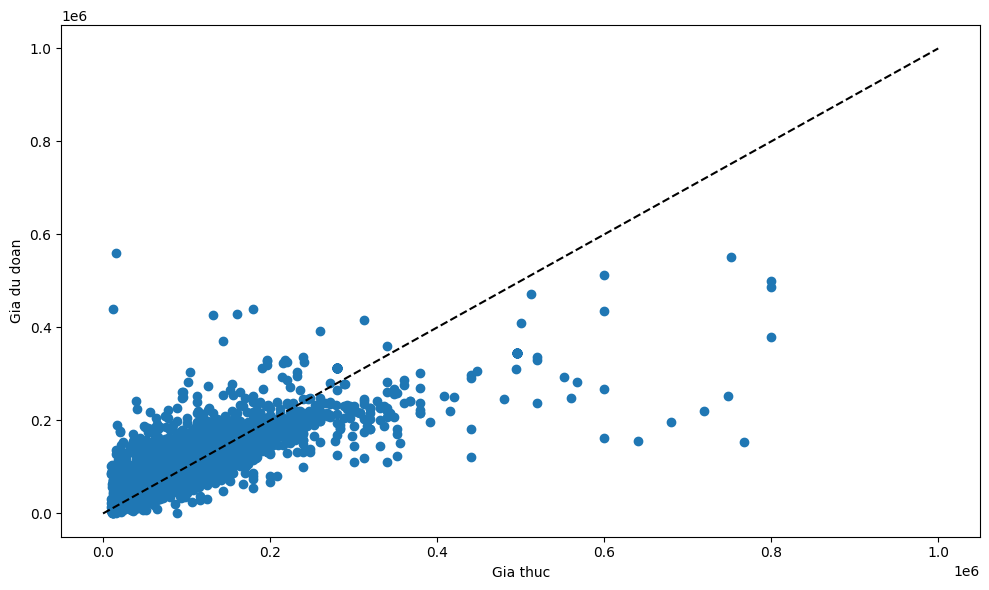

In [22]:
# Bước 8: Vẽ đồ thị mô hình hồi quy tuyến tính

# Vẽ đồ thị mô hình hồi quy tuyến tính
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 1000000], [0, 1000000], '--k')
plt.axis('tight')
plt.xlabel('Gia thuc')
plt.ylabel('Gia du doan')
plt.tight_layout()
plt.show()


In [26]:
# Tiến hành kiểm định giả thuyết với mức ý nghĩa 5%
# Kiểm định giả thuyết với mức ý nghĩa 5%

def p_value(model, X, y):
    # number of features
    n = X.shape[0]
    # number of independent variables
    k = X.shape[1]
    # R-squared
    r2 = r2_score(y, model.predict(X))
    # Adjusted R-squared
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    # F-statistic
    f_stat = (r2_adj / k) / ((1 - r2_adj) / (n - k - 1))
    # p-value
    p_value = 1 - stats.f.cdf(f_stat, k, n - k - 1)
    print('p_value: ', p_value)

# in ra p-value
p_value(model, X_train, Y_train)


p_value:  1.1102230246251565e-16


Đoạn mã Python này định nghĩa một hàm `p_value` để tính và in ra giá trị p-value cho một mô hình hồi quy và tập dữ liệu đã cho. 

Hàm này hoạt động như sau:

1. Tính số lượng quan sát `n` và số lượng biến độc lập `k`.
2. Tính giá trị R-squared `r2` và R-squared điều chỉnh `r2_adj`.
3. Tính thống kê F `f_stat` dựa trên `r2_adj`, `k`, và `n`.
4. Tính giá trị p-value từ `f_stat`, `k`, và `n` sử dụng hàm phân phối tích lũy của phân phối F.
5. In ra giá trị p-value.

Hàm sau đó được gọi với mô hình và dữ liệu huấn luyện để in ra giá trị p-value. Giá trị p-value này có thể được sử dụng để xác định ý nghĩa thống kê của mô hình.

Giá trị p (p-value) trong mô hình  là `1.1102230246251565e-16`, một giá trị rất nhỏ gần như bằng không.

Trong thống kê, giá trị p rất nhỏ như vậy thường cho thấy rằng có bằng chứng mạnh mẽ để bác bỏ giả thuyết không. Giả thuyết không thường là giả định rằng không có mối quan hệ giữa hai biến hoặc không có sự khác biệt giữa các nhóm.

Với giá trị p nhỏ như vậy, chúng ta có thể kết luận rằng mô hình hồi quy tuyến tính của chúng ta có ý nghĩa thống kê, tức là có mối quan hệ đáng kể giữa các biến độc lập và biến phụ thuộc.

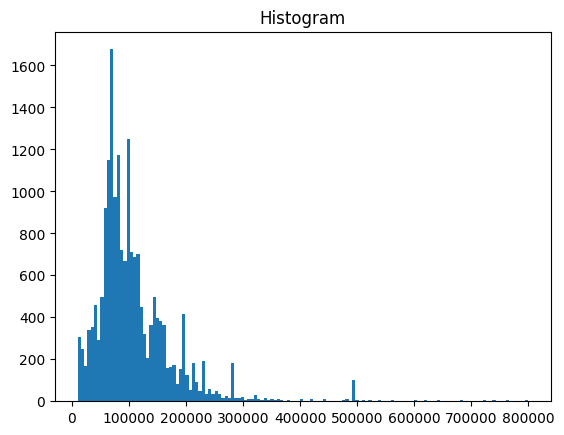

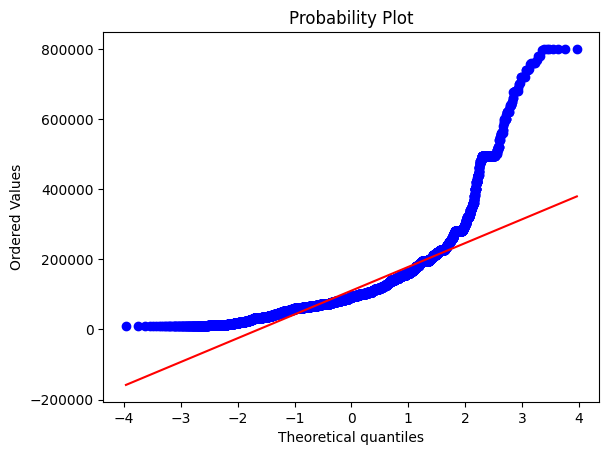

In [25]:
# hàm kiểm tra tính chất phân phối chuẩn của dữ liệu
def check_normality(data):
    # number of data points
    n = len(data)
    # number of bins
    k = int(np.sqrt(n))
    # histogram
    plt.hist(data, bins=k)
    # title
    plt.title('Histogram')
    # show plot
    plt.show()
    # QQ-plot
    stats.probplot(data, dist="norm", plot=plt)
    # show plot
    plt.show()
    
# kiểm tra tính chất phân phối chuẩn của dữ liệu
check_normality(Y_train)    